In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

seed = 42
np.random.seed(seed)

# Simple data

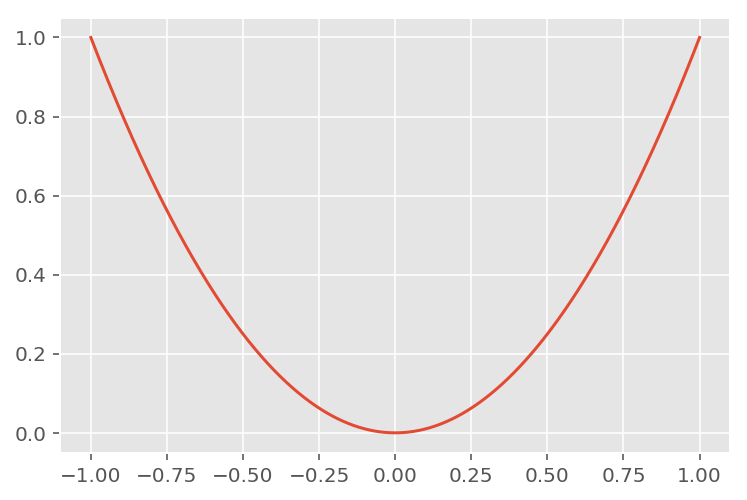

In [110]:
x = np.linspace(-1,1,1000)
y = x**2

plt.plot(x,y)
plt.show()

In [166]:
tf.reset_default_graph()
#Defining network
x_tf=tf.placeholder(tf.float32, shape=[None,1])
y_tf=tf.placeholder(tf.float32, shape=[None,1])
    
L1=tf.contrib.layers.fully_connected(x_tf,num_outputs=10,activation_fn=tf.nn.tanh)
L2=tf.contrib.layers.fully_connected(L1,num_outputs=10,activation_fn=tf.nn.tanh)
output=tf.contrib.layers.fully_connected(L2,num_outputs=1,activation_fn=None)

#Defining loss
loss=tf.reduce_mean(tf.square(y_tf - output)) 

optimizer_Adam = tf.train.AdamOptimizer()
train_op_Adam = optimizer_Adam.minimize(loss)

optimizer = tf.contrib.opt.ScipyOptimizerInterface(loss, method = 'BFGS')
   
init = tf.global_variables_initializer()

In [167]:
x_train = x.reshape(x.size,1)
y_train = y.reshape(y.size,1)
tf_dict={x_tf: x_train, y_tf: y_train}

In [168]:
sess = tf.Session()
sess.run(init)

In [169]:
nIter=0
for it in np.arange(nIter):
    sess.run(train_op_Adam, tf_dict)
    loss_val =sess.run(loss, tf_dict)
    if it%10000==0:
        print(it,loss_val)


In [170]:
optimizer.minimize(session=sess, feed_dict=tf_dict)

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 0.000001
  Number of iterations: 120
  Number of functions evaluations: 130


In [171]:
sess.run(loss, feed_dict=tf_dict)

5.555296e-07

In [172]:
y_pred = sess.run(output, feed_dict=tf_dict)

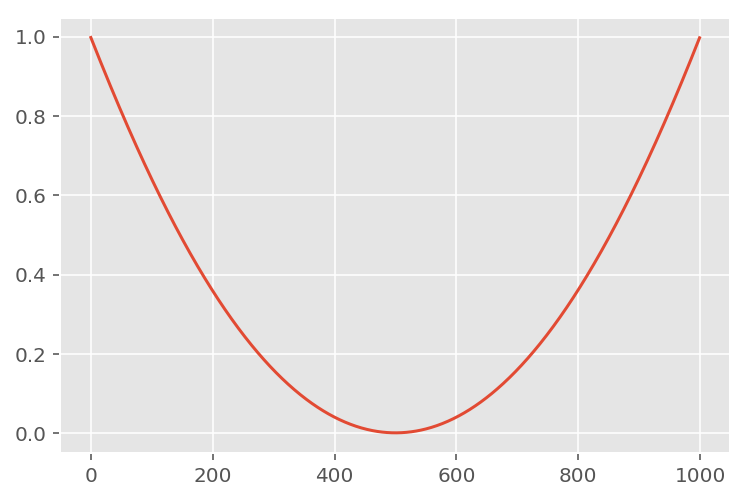

In [173]:
plt.plot(np.squeeze(y_pred))

In [174]:
dydx = sess.run(tf.gradients(output, x_tf), feed_dict=tf_dict)

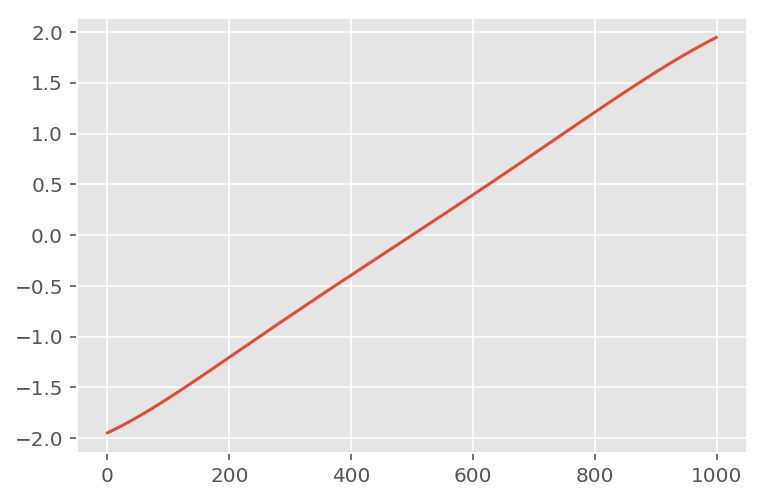

In [175]:
plt.plot(np.squeeze(dydx))

In [176]:
d2ydx2 = sess.run(tf.gradients(tf.gradients(output, x_tf),x_tf), feed_dict=tf_dict)

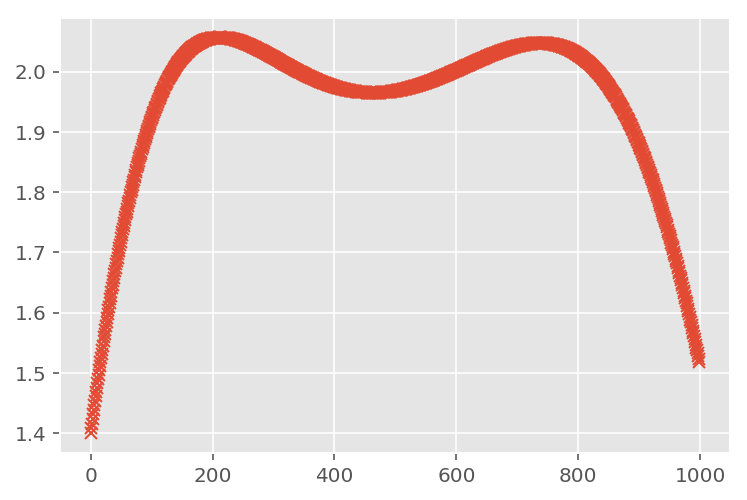

In [177]:
plt.plot(np.squeeze(d2ydx2),'x')

# Custom activation function

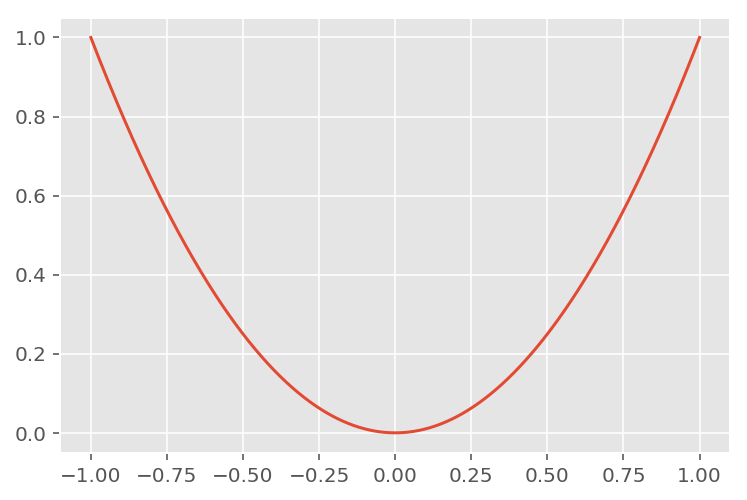

In [264]:
x = np.linspace(-1,1,1000)
y = x**2

plt.plot(x,y)
plt.show()

In [265]:
def tanhshrink(x):
    return x-tf.tanh(x)

In [267]:
tf.reset_default_graph()
#Defining network
x_tf=tf.placeholder(tf.float32, shape=[None,1])
y_tf=tf.placeholder(tf.float32, shape=[None,1])
    
L1=tf.contrib.layers.fully_connected(x_tf,num_outputs=10,activation_fn=tanhshrink)
L2=tf.contrib.layers.fully_connected(L1,num_outputs=10,activation_fn=tanhshrink)
output=tf.contrib.layers.fully_connected(L2,num_outputs=1,activation_fn=None)

#Defining other stuff
loss=tf.reduce_mean(tf.square(y_tf - output)) 
optimizer = tf.contrib.opt.ScipyOptimizerInterface(loss, method = 'BFGS',options={'gtol':10**(-8)})
init = tf.global_variables_initializer()

In [268]:
x_train = x.reshape(x.size,1)
y_train = y.reshape(y.size,1)
tf_dict={x_tf: x_train, y_tf: y_train}

In [269]:
sess = tf.Session()
sess.run(init)
optimizer.minimize(session=sess, feed_dict=tf_dict)

INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 0.000000
  Number of iterations: 155
  Number of functions evaluations: 260


In [270]:
sess.run(loss, feed_dict=tf_dict)

1.4329601e-09

In [271]:
dydx = sess.run(tf.gradients(output, x_tf), feed_dict=tf_dict)
d2ydx2 = sess.run(tf.gradients(tf.gradients(output, x_tf),x_tf), feed_dict=tf_dict)

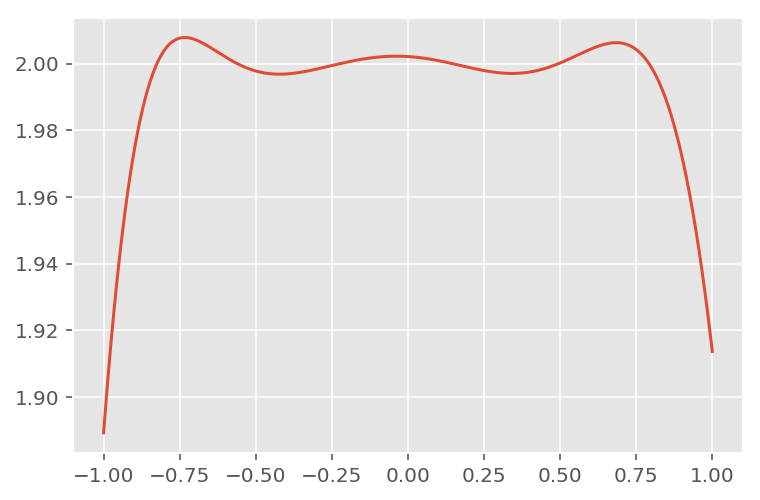

In [273]:
#plt.plot(x,np.squeeze(dydx))
plt.plot(x,np.squeeze(d2ydx2))

## Getting the variables out

In [253]:
tf.trainable_variables()

[<tf.Variable 'fully_connected/weights:0' shape=(1, 10) dtype=float32_ref>,
 <tf.Variable 'fully_connected/biases:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'fully_connected_1/weights:0' shape=(10, 10) dtype=float32_ref>,
 <tf.Variable 'fully_connected_1/biases:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'fully_connected_2/weights:0' shape=(10, 1) dtype=float32_ref>,
 <tf.Variable 'fully_connected_2/biases:0' shape=(1,) dtype=float32_ref>]

In [262]:
kernel = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, 'fully_connected_1/weights:0')[0]
bias = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, 'fully_connected_1/biases:0')[0]

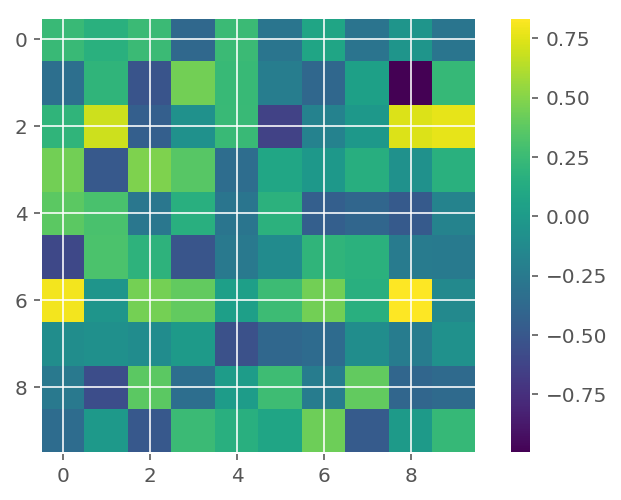

In [263]:
plt.imshow(sess.run(kernel))
plt.colorbar()

In [250]:
sess.run(bias)

array([-0.3671072 , -0.02872359, -0.06339234, -0.5024194 ,  0.1584568 ,
        0.00490175,  0.05816687,  0.00539294, -0.44934547,  0.05895972],
      dtype=float32)